In [1]:
from imports import *

In [2]:
df=sns.load_dataset('tips')

# 1

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df['yhat_baseline'] = df['tip'].mean()
df.head(3)


,total_bill,tip,sex,smoker,day,time,size,yhat_baseline
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279


# 2

In [5]:
model = LinearRegression().fit(df[['total_bill']],df.tip)



In [6]:
df['y_hat'] = model.predict(df[['total_bill']])

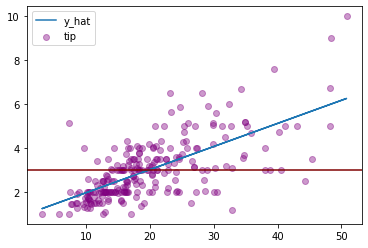

In [76]:
plt.plot(df['total_bill'],df['y_hat'],label='y_hat')
plt.scatter(df['total_bill'],df['tip'],c='purple',label='tip',alpha=0.4)
plt.axhline(df['tip'].mean(), c='maroon')
plt.legend(loc='upper left')



# 3

In [9]:
import warnings
warnings.filterwarnings('ignore')


In [12]:
# compute residuals
df['residual'] = df['y_hat'] - df['tip']
df['residual_baseline'] = df['yhat_baseline'] - df['tip']


In [13]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,y_hat,residual,residual_baseline
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,1.694636,1.988279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,0.346223,1.338279
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,-0.373165,-0.501721
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,0.097250,-0.311721
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,-0.107178,-0.611721


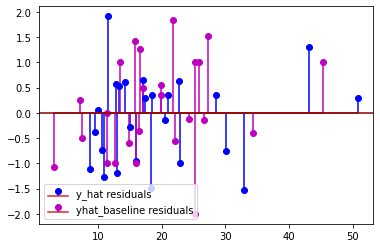

In [73]:
plt.stem(df['total_bill'].sample(25),df['residual'].sample(25),'bo',markerfmt='bo',label='y_hat residuals')
plt.stem(df['total_bill'].sample(25),df['residual_baseline'].sample(25),'mo',markerfmt='mo',label='yhat_baseline residuals')
plt.axhline(0, c='maroon')
plt.legend(loc='lower left')


# 4 / 5

In [37]:
SSE2 = mean_squared_error(df.tip, df.y_hat)*len(df)
SSE2_baseline = mean_squared_error(df.tip, df.yhat_baseline)*len(df)

print("SSE sklearn: ",SSE2) 
print("SSE sklearn - baseline: ", SSE2_baseline) 


SSE sklearn:  252.788743850776
SSE sklearn - baseline:  465.2124770491804


In [39]:
MSE2 = mean_squared_error(df.tip, df.y_hat)
MSE2_baseline = mean_squared_error(df.tip, df.yhat_baseline)


print("MSE sklearn: ",MSE2) 
print("MSE sklearn - baseline: ",MSE2_baseline) 


MSE sklearn:  1.036019442011377
MSE sklearn - baseline:  1.906608512496641


# 6 

In [89]:
rmse = mean_squared_error(df.tip, df.y_hat, squared=False)
rmse_baseline = mean_squared_error(df.tip, df.yhat_baseline, squared=False)


print("rmse sklearn: ",rmse) 
print("rmse_baseline: ",rmse_baseline) 


rmse sklearn:  1.0178504025697377
rmse_baseline:  1.3807999538298954


In [ ]:
r2_score

In [82]:
if SSE2-SSE2_baseline<0:
	print("y_hat superior")
else:
	print("yhat_baseline superior")	

y_hat superior


# 7

In [83]:
# sklearn.metrics.explained_variance_score

evs = explained_variance_score(df.tip, df.y_hat)
print('Explained Variance = ', round(evs,3))


Explained Variance =  0.457


# 8

Our model did "aight". 

Our variance tells us that at least half the movement on the "tips" axis is, in fact, caused by the total price of the meal. 

Compared to our baseline, you can see that our model was almost twice as good at eliminating error.

# 10

In [98]:
import evaluate as eval

In [95]:
mpg=data('mpg')

In [101]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [107]:
model = LinearRegression().fit(mpg[['displ']], mpg.hwy)

In [108]:
actual = mpg.hwy # y
predicted = model.predict(mpg[['displ']]) # yhat

In [109]:
eval.regression_errors(actual, predicted)

sse     3413.829009
ess     4847.833384
tss     8261.662393
mse       14.589013
rmse       3.819557
r2         0.586787
dtype: float64

In [110]:
eval.better_than_baseline(actual, predicted)

True

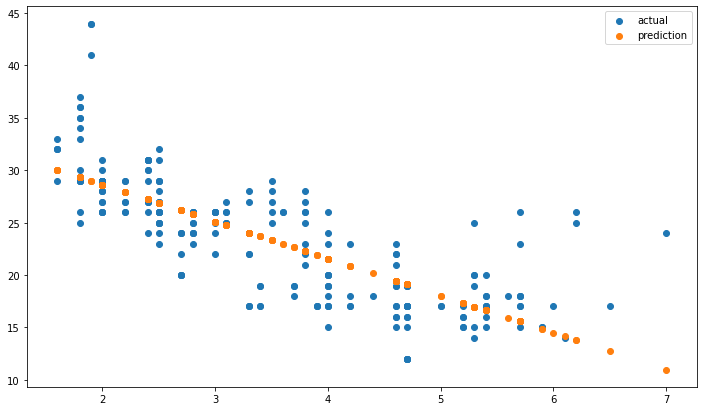

In [111]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.scatter(mpg.displ, mpg.hwy, label='actual')
ax.scatter(mpg.displ, predicted, label='prediction')
plt.legend(loc='best')
